___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***) and **Deep Learning algorithms**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

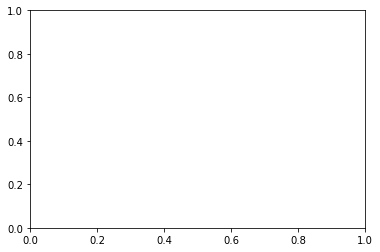

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter

# nltk.download('wordnet')

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.express as px
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
%matplotlib inline
fig, ax = plt.subplots()
# fig.set_size_inches(10, 6)
plt.rcParams["figure.figsize"] = (12, 8)  # the size of A4 paper use (11.7, 8.27)
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# !pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

# !pip install -U pandas-profiling --user
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling
from pandas_profiling.report.presentation.flavours.html.templates import create_html_assets

In [114]:
## Some Useful Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    
        
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')     
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop realted columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)
    
###############################################################################

In [115]:
df0 = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df = df0.copy()
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [116]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [117]:
first_looking(df)

Shape:(23486, 11)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None
------------------------------------------

In [118]:
df.head(1)

,unnamed:_0,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates


In [119]:
df.sample(5)

,unnamed:_0,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
10568,10568,1110,40,NaN,Great dress. bit see through on the skirt. need to wear slip with it.,4,1,0,General,Dresses,Dresses
17347,17347,862,51,Another big boxy top,I had high hopes for this top but once again it is just a big boxy too much material top. i get the style but if it adds 10lbs to your middle area its not for me. it is a thin material so it does ...,2,0,7,General Petite,Tops,Knits
19752,19752,307,35,It's okay,I've noticed this sports bra several times in my store-along with a whole line of products that share this fabric and didn't feel necessarily compelled to try it on but i finally did this last tim...,3,0,9,Initmates,Intimate,Lounge
20703,20703,833,35,NaN,Super large and a very weird cut. the sides were much shorter than the front and back and this just looked awful on me.,3,0,6,General,Tops,Blouses
14503,14503,1080,38,Love this!,Love this dress! ordered a 0p and it fit perfectly.,5,1,0,General,Dresses,Dresses


In [120]:
df.drop("unnamed:_0", axis=1, inplace=True)
df.head(1)

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates


In [121]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
clothing_id,23486.00,918.12,203.30,0.00,861.00,936.00,1078.00,1205.00
age,23486.00,43.20,12.28,18.00,34.00,41.00,52.00,99.00
rating,23486.00,4.20,1.11,1.00,4.00,5.00,5.00,5.00
recommended_ind,23486.00,0.82,0.38,0.00,1.00,1.00,1.00,1.00
positive_feedback_count,23486.00,2.54,5.70,0.00,0.00,1.00,3.00,122.00


In [122]:
df.describe(include=object).T

,count,unique,top,freq
title,19676,13993,Love it!,136
review_text,22641,22634,Perfect fit and i've gotten so many compliments. i buy all my suits from here now!,3
division_name,23472,3,General,13850
department_name,23472,6,Tops,10468
class_name,23472,20,Dresses,6319


In [123]:
df.columns

Index(['clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

In [124]:
# Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

df["rating"].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64

In [125]:
df["division_name"].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: division_name, dtype: int64

In [126]:
df["department_name"].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: department_name, dtype: int64

In [127]:
df["class_name"].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: class_name, dtype: int64

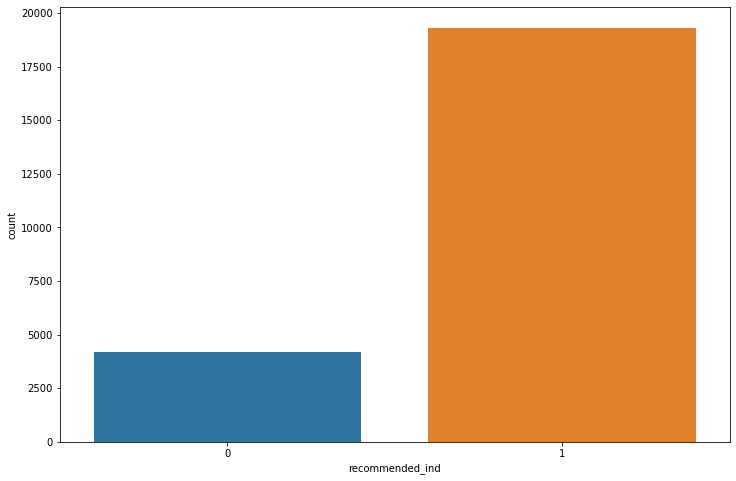

In [128]:
sns.countplot(data = df, x ="recommended_ind");

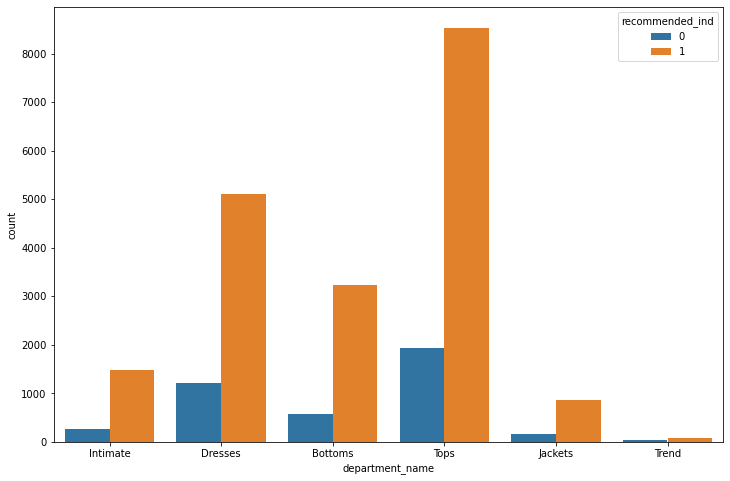

In [129]:
sns.countplot(data = df, x ="department_name", hue = "recommended_ind");

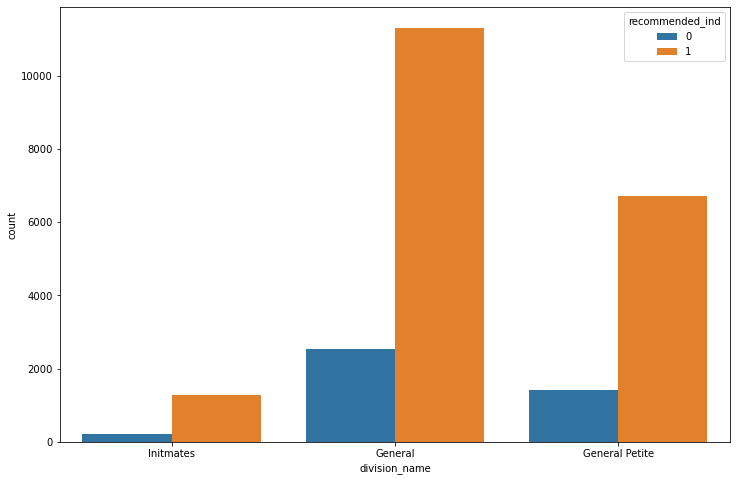

In [130]:
sns.countplot(data = df, x ="division_name", hue = "recommended_ind");

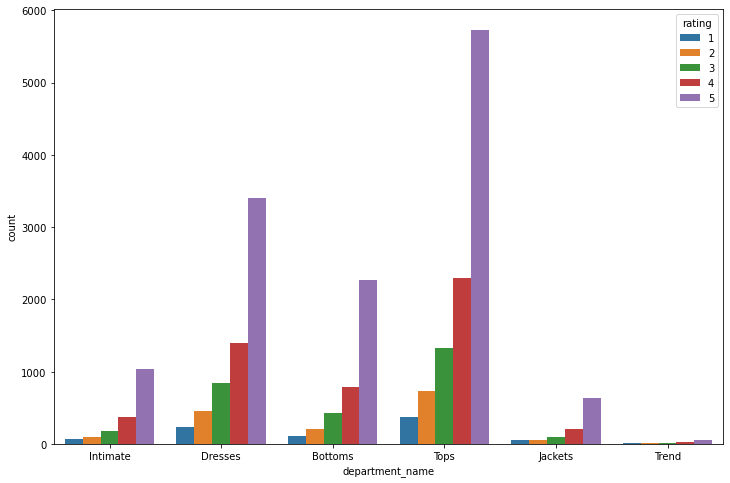

In [131]:
sns.countplot(data = df, x ="department_name", hue = "rating");

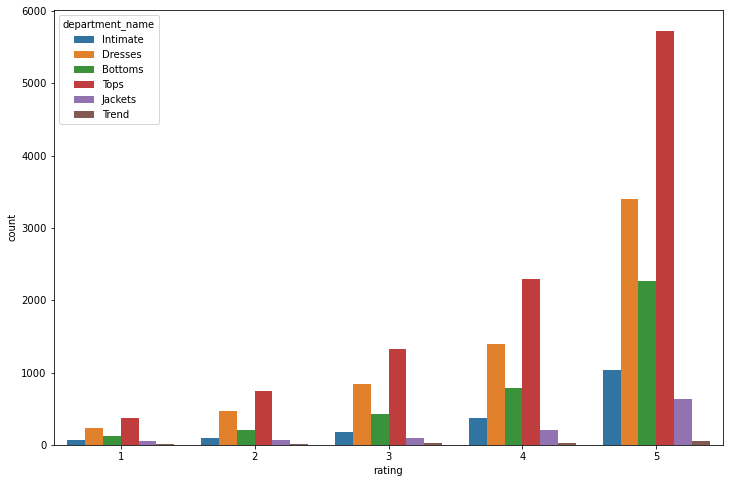

In [132]:
sns.countplot(data = df, x ="rating", hue = "department_name");

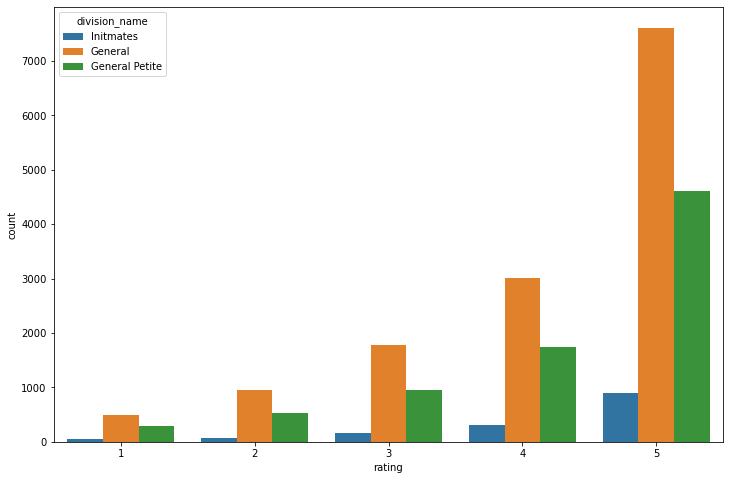

In [133]:
sns.countplot(data = df, x ="rating", hue = "division_name");

### Data Wrangling

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [134]:
df.head(2)

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4,General,Dresses,Dresses


In [135]:
# Recommended IND: Binary variable stating where the customer recommends the product 
# where 1 is recommended, 0 is not recommended.

df["recommended_ind"].value_counts()

1    19314
0     4172
Name: recommended_ind, dtype: int64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [136]:
df.columns

Index(['clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

In [137]:
df.drop(['clothing_id', 'age', 'title', 'rating',
       'positive_feedback_count', 'division_name',
       'department_name', 'class_name'], axis=1, inplace=True)

In [138]:
df.head(3)

,review_text,recommended_ind
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",1
2,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,0


### Missing Value Detection

In [139]:
df['review_text'].isnull().value_counts()

False    22641
True       845
Name: review_text, dtype: int64

In [140]:
df['recommended_ind'].isnull().value_counts()

False    23486
Name: recommended_ind, dtype: int64

In [141]:
23486 - 845

22641

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review_text      22641 non-null  object
 1   recommended_ind  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [143]:
df = df.dropna()

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review_text      22641 non-null  object
 1   recommended_ind  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [144]:
df['review_text'].isnull().value_counts()

False    22641
Name: review_text, dtype: int64

In [145]:
df['recommended_ind'].isnull().value_counts()

False    22641
Name: recommended_ind, dtype: int64

In [146]:
missing_values(df)

,Missing_Number,Missing_Percent


---
---


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [147]:
# # \w typically matches [A-Za-z0-9_]

# text = re.sub('[^\w\s]', '', str(df["review_text"]))
# text

In [148]:
def cleaning_fsa(data):
    
    import re
    #1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]','', data)
         
    #2. Tokenize
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [151]:
stop_words = stopwords.words('english')

In [153]:
text = cleaning_fsa(str(df["review_text"]))
text

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact co love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt happy snag dress great price easy slip flattering cut color combo reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleevesnnot bu fit well top see never would worked im glad able try store didnt order online different fabric would bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust sh dress lovely platinum feminine fit perfectly easy wear comfy highly recommend name length d

In [154]:
df["review_text"] = df["review_text"].apply(cleaning_fsa)
df["review_text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

In [155]:
df.head(3)

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,1
2,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom...,0


### Rare Words

In [157]:
" ".join(df["review_text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'complimen

In [158]:
word_values = pd.Series(" ".join(df["review_text"]).split()).value_counts()
word_values

dress       11319
fit         10091
size         9349
love         8968
top          8256
            ...  
takeout         1
teenybop        1
hugely          1
shirred         1
platinum        1
Length: 16758, dtype: int64

In [159]:
rare_words = word_values[word_values <= 2]

In [160]:
rare_words

wristforearm    2
magnolia        2
smalltight      2
urban           2
underrated      2
               ..
takeout         1
teenybop        1
hugely          1
shirred         1
platinum        1
Length: 10935, dtype: int64

In [161]:
rare_words.value_counts()

1    9058
2    1877
dtype: int64

In [162]:
len(rare_words)

10935

In [163]:
rare_words.index

Index(['wristforearm', 'magnolia', 'smalltight', 'urban', 'underrated',
       'henleys', 'greenyellow', 'outrageous', 'blueteal', 'status',
       ...
       'quaiity', 'befo', 'slam', 'brokenin', 'accomadate', 'takeout',
       'teenybop', 'hugely', 'shirred', 'platinum'],
      dtype='object', length=10935)

In [164]:
df["review_text"] = df["review_text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df["review_text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight l...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review_text      22641 non-null  object
 1   recommended_ind  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [166]:
df.head(3)

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,1
2,high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight l...,0


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [167]:
df.columns

Index(['review_text', 'recommended_ind'], dtype='object')

In [168]:
df[df["recommended_ind"] == 0]

,review_text,recommended_ind
2,high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight l...,0
5,love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening skirt would take away embellish...,0
10,dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back,0
22,first pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath look like described sa...,0
25,loved material didnt really look long dress purchased large medium im atleast material foot gap front much wider look felt like dress fell flat returned im usually large med fit better jean,0
...,...,...
23449,tried color really pretty fun want pair pant looked awful muscular thigh dont think cut falttering also comfortable looked crotch seemed little low though pant correct size,0
23450,wanted love jacket soft great color unfortunately light weight almost like shirt fabric nice heft fabric though nice length accept sleeve short small right size looking something slightly warmer l...,0
23460,purchased good price typically love maeve winwin fabric thin slinky unfortunate way made finding appropriate undergarment difficult add slip helped figured since im losing weight would look better...,0
23478,surprised positive review product terrible cut weird place make look wide skirt also like picture darker heavier material isnt great return,0


In [170]:
df[df["recommended_ind"] == 1]

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,1
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,1
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,1
6,basket hte last see would look like person store pick went teh color pale hte color really gorgeous turn trying little baggy hte x hte size bummer petite decided though said everything pant skirt ...,1
...,...,...
23479,wasnt sure ordering skirt couldnt see person first im glad skirt design well made doesnt look feel cheap color isnt red worked pale skin better anticipated wore daughter dance production tall boot...,1
23481,happy snag dress great price easy slip flattering cut color combo,1
23482,reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleeve maybe others ok,1
23484,bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might worth side note dress de...,1


In [171]:
df["recommended_ind"].value_counts()

1    18540
0     4101
Name: recommended_ind, dtype: int64

### Collect Words (positive and negative separately)

In [172]:
" ".join(df["review_text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'f

In [175]:
neg_words = " ".join(df[df["recommended_ind"] == 0].review_text).split()
neg_words 

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',
 'fit',
 'tight',
 'mat

In [176]:
pos_words =" ".join(df[df["recommended_ind"] == 1].review_text).split()
pos_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'petite',
 'decided',
 'though',
 'said',
 'everything',
 '

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [181]:
review_text = df["review_text"]

In [179]:
all_words = " ".join(review_text)

In [180]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

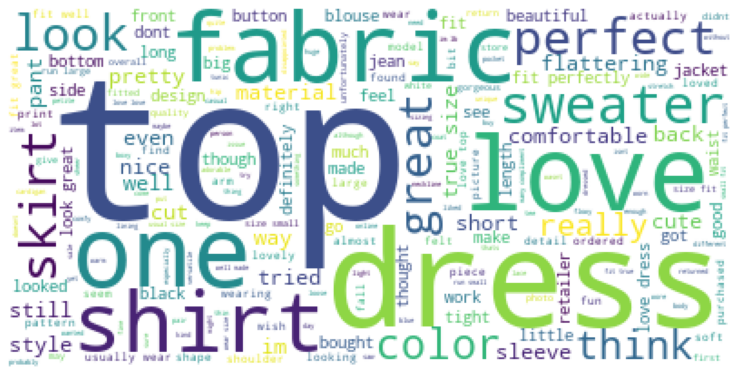

In [182]:
from wordcloud import WordCloud 

wordcloud = WordCloud(background_color="white", max_words =250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

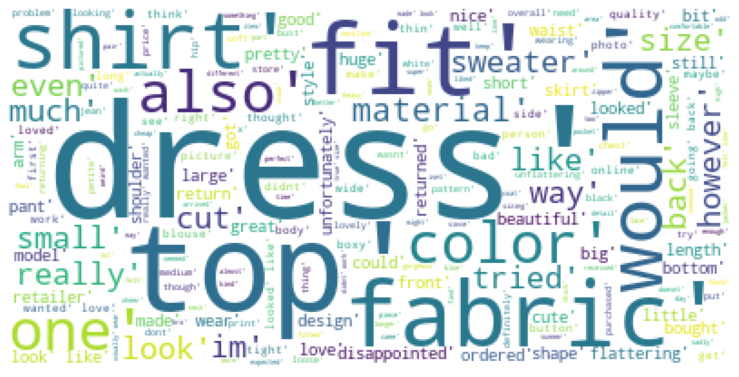

In [184]:
wordcloud = WordCloud(background_color="white", max_words =250).generate(str(neg_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

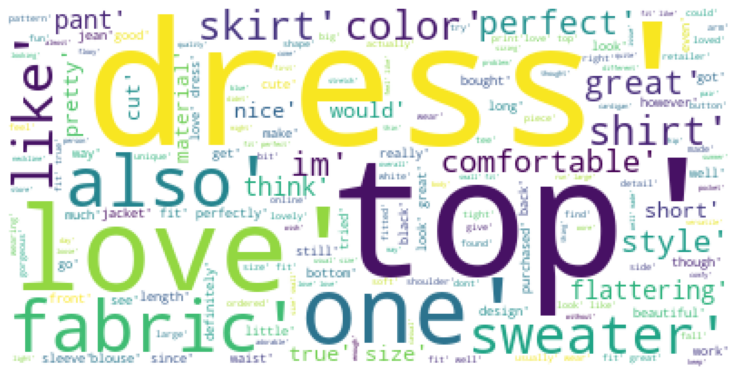

In [185]:
wordcloud = WordCloud(background_color="white", max_words =250).generate(str(pos_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In the next step we create a numerical feature vector for each document:

### Count Vectorization

### TF-IDF

## Logistic Regression

### CountVectorizer

### TF-IDF

## Naive Bayes 

### Countvectorizer

### TF-IDF

## Support Vector Machine (SVM)

### Countvectorizer

### TD-IDF

## Random Forest

### Countvectorizer

### TF-IDF

## Ada Boosting

### Countvectorizer

### TF-IDF

## DL modeling

### Tokenization

### Creating word index

### Converting tokens to numeric

### Maximum number of tokens for all documents¶

### Fixing token counts of all documents (pad_sequences)

### Train Set Split

### Modeling

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___